# Count Number of Reads in the Fasta File

In [26]:
from Bio import SeqIO
original_reads = SeqIO.parse("TCA454Reads.fna", "fasta")

total_count = 0
for rec in original_reads:
    total_count += 1

print("%i reads" % total_count)

34584 reads


# Remove barcode, number of sequences assigned to each sample, percentage that were not assigned

In [27]:
#Create a dictionary for the barcode
import csv
import operator 
from operator import itemgetter
from natsort import natsorted, ns

with open('barcodes.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    bar_dict = dict(list(reader))

bar_dict = { k:v.strip() for k, v in bar_dict.iteritems()}
bar_dict

{'Sample_1': 'CAGTCAGT',
 'Sample_10': 'CTACGATG',
 'Sample_11': 'GACACTCA',
 'Sample_12': 'GAGTACAG',
 'Sample_13': 'GCATATCG',
 'Sample_14': 'GCTACGTA',
 'Sample_15': 'GTACACGT',
 'Sample_16': 'TACGATCG',
 'Sample_17': 'TAGCGCAT',
 'Sample_18': 'TCACTGTC',
 'Sample_19': 'TCTGTGAG',
 'Sample_2': 'ACACACTG',
 'Sample_20': 'TGAGTCAC',
 'Sample_21': 'ACAGACTC',
 'Sample_22': 'ACTGCTGA',
 'Sample_3': 'ACGACATC',
 'Sample_4': 'AGACACTC',
 'Sample_5': 'ATATCGCG',
 'Sample_6': 'ATCGATGC',
 'Sample_7': 'CACTACAG',
 'Sample_8': 'CGATATGC',
 'Sample_9': 'CGTACGAT'}

In [28]:
#Remove unbarcoded samples and count number of reads per sample
sample_count = {}

for key, value in bar_dict.iteritems():
    bar_trim = (rec[9:] for rec in \
                SeqIO.parse("TCA454Reads.fna", "fasta") \
                if rec.seq.startswith(value))
    fastafile = key + ".fasta"
    count = SeqIO.write(bar_trim, fastafile, "fasta")
    sample_count[key] = count

In [29]:
natsorted(sample_count.items(), key=lambda t: t[0])

[('Sample_1', 661),
 ('Sample_2', 902),
 ('Sample_3', 1026),
 ('Sample_4', 2072),
 ('Sample_5', 1092),
 ('Sample_6', 588),
 ('Sample_7', 1788),
 ('Sample_8', 1038),
 ('Sample_9', 1608),
 ('Sample_10', 843),
 ('Sample_11', 3585),
 ('Sample_12', 1412),
 ('Sample_13', 1187),
 ('Sample_14', 499),
 ('Sample_15', 2851),
 ('Sample_16', 769),
 ('Sample_17', 656),
 ('Sample_18', 811),
 ('Sample_19', 6597),
 ('Sample_20', 2035),
 ('Sample_21', 1525),
 ('Sample_22', 339)]

In [30]:
percent_no_assign = (1-float(sum(sample_count.values()))/float(total_count))*100
print("%i percent of raw reads is not assigned because no barcode matched" % percent_no_assign)

2 percent of raw reads is not assigned because no barcode matched


# Remove primers, sequence with more than 2Ns, short than 200bps

In [31]:
#create a fasta file list
final_sample_fasta=[]
for i in bar_dict.keys(): 
    sample_fasta = i+".fasta"
    final_sample_fasta.append(sample_fasta)
final_sample_fasta = natsorted(final_sample_fasta)
final_sample_fasta

['Sample_1.fasta',
 'Sample_2.fasta',
 'Sample_3.fasta',
 'Sample_4.fasta',
 'Sample_5.fasta',
 'Sample_6.fasta',
 'Sample_7.fasta',
 'Sample_8.fasta',
 'Sample_9.fasta',
 'Sample_10.fasta',
 'Sample_11.fasta',
 'Sample_12.fasta',
 'Sample_13.fasta',
 'Sample_14.fasta',
 'Sample_15.fasta',
 'Sample_16.fasta',
 'Sample_17.fasta',
 'Sample_18.fasta',
 'Sample_19.fasta',
 'Sample_20.fasta',
 'Sample_21.fasta',
 'Sample_22.fasta']

In [32]:
#filter sequence quality based on the exact primer sequence match
trim_count_list = []

for fasta in final_sample_fasta:
    primer_trim = (rec for rec in \
                    SeqIO.parse(fasta, 'fasta') \
                    if rec.seq.startswith('AATAGTAGCCAG'))
    trimfile = 'primer_trim_' + fasta
    trim_count = SeqIO.write(primer_trim, trimfile, "fasta")
    trim_count_list.append(trim_count)
trim_count_dict = dict(zip(natsorted(bar_dict.keys()), trim_count_list))
natsorted(trim_count_dict.items(), key=lambda t: t[0])

[('Sample_1', 8),
 ('Sample_2', 12),
 ('Sample_3', 13),
 ('Sample_4', 15),
 ('Sample_5', 11),
 ('Sample_6', 1),
 ('Sample_7', 12),
 ('Sample_8', 1),
 ('Sample_9', 6),
 ('Sample_10', 4),
 ('Sample_11', 24),
 ('Sample_12', 0),
 ('Sample_13', 5),
 ('Sample_14', 3),
 ('Sample_15', 0),
 ('Sample_16', 0),
 ('Sample_17', 2),
 ('Sample_18', 3),
 ('Sample_19', 1),
 ('Sample_20', 15),
 ('Sample_21', 13),
 ('Sample_22', 9)]

In [7]:
#filter sequence quality based on the exact primer sequence match, sequence length > 200, and no more than 2'N'
trim_count_list = []

for fasta in final_sample_fasta:
    primer_trim = (rec for rec in \
                    SeqIO.parse(fasta, 'fasta') \
                    if rec.seq.startswith('AATAGTAGCCAG') and len(rec.seq) > 200 and rec.seq.count('N') <= 2 )
    trimfile = 'primer_trim_' + fasta
    trim_count = SeqIO.write(primer_trim, trimfile, "fasta")
    trim_count_list.append(trim_count)
trim_count_dict = dict(zip(natsorted(bar_dict.keys()), trim_count_list))
natsorted(trim_count_dict.items(), key=lambda t: t[0])

[('Sample_1', 8),
 ('Sample_2', 8),
 ('Sample_3', 6),
 ('Sample_4', 3),
 ('Sample_5', 9),
 ('Sample_6', 0),
 ('Sample_7', 9),
 ('Sample_8', 1),
 ('Sample_9', 5),
 ('Sample_10', 2),
 ('Sample_11', 0),
 ('Sample_12', 0),
 ('Sample_13', 0),
 ('Sample_14', 3),
 ('Sample_15', 0),
 ('Sample_16', 0),
 ('Sample_17', 0),
 ('Sample_18', 0),
 ('Sample_19', 0),
 ('Sample_20', 8),
 ('Sample_21', 5),
 ('Sample_22', 9)]

In [8]:
total_read_remain = sum(trim_count_dict.values())
percent_no_assign_b = (1-float(sum(trim_count_dict.values()))/float(total_count))*100

print("%i percent of raw reads is removed due to no exact primer matched, shorter than 200bps and having more than 2 Ns" % percent_no_assign_b)

print("Only %i reads are kept after quality filtering" % total_read_remain)

99 percent of raw reads is removed due to no exact primer matched, shorter than 200bps and having more than 2 Ns
Only 76 reads are kept after quality filtering


# Mutation Analysis

In [9]:
#Make a list of sample that have reads after quality filtering
sample_filter_list = {k for k, v in trim_count_dict.iteritems()\
                      if v != 0}

#Make a list of sample fasta files that have reads after quality filtering
qc_pass_fasta=[]
for i in sample_filter_list: 
    qc_fasta = "primer_trim_"+i+".fasta"
    qc_pass_fasta.append(qc_fasta)
qc_pass_fasta = natsorted(qc_pass_fasta)

In [10]:
#Make a list of nucleotide of position 27 and 40 from the reads in qc_pass_fasta
list1=[]
list2=[]

for i in qc_pass_fasta:
    for rec in SeqIO.parse(i, 'fasta'):
        bb = rec.seq[27]+rec.seq[40]
        list1.append(bb)
    list2.append(list1)
    list1=[]

In [11]:
#Make a dictionary from sample and nucleotide lists
mutate_dict = dict(zip(natsorted(sample_filter_list), list2))
natsorted(mutate_dict.items(), key=lambda t: t[0])

[('Sample_1', ['CG', 'GG', 'GG', 'AA', 'GG', 'GG', 'GG', 'GG']),
 ('Sample_2', ['GG', 'GG', 'GG', 'GG', 'GG', 'GC', 'AA', 'GG']),
 ('Sample_3', ['GG', 'GG', 'GG', 'GG', 'GG', 'GA']),
 ('Sample_4', ['CA', 'GG', 'AA']),
 ('Sample_5', ['GG', 'GG', 'GA', 'GG', 'GA', 'GG', 'AA', 'GG', 'GG']),
 ('Sample_7', ['GG', 'GA', 'GG', 'GA', 'AA', 'GG', 'GA', 'GG', 'GA']),
 ('Sample_8', ['GA']),
 ('Sample_9', ['GG', 'GG', 'GA', 'GG', 'GA']),
 ('Sample_10', ['AA', 'GA']),
 ('Sample_14', ['GG', 'GG', 'GA']),
 ('Sample_20', ['AA', 'AA', 'GA', 'CA', 'GA', 'GG', 'CG', 'GG']),
 ('Sample_21', ['GG', 'AA', 'GG', 'CG', 'GA']),
 ('Sample_22', ['GG', 'GA', 'GC', 'AA', 'GG', 'GG', 'GG', 'GA', 'GG'])]

In [12]:
#Convert mutate_dict to mutate table for data analysis and graphing
import pandas as pd

mutate_table = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mutate_dict.iteritems() ]))
mutate_table = pd.melt(mutate_table, var_name="Sample", value_name="Mutation")
mutate_table = mutate_table.dropna()

def nat_sort_column(table, series):
    table['indexNumber'] = [int(i.split('_')[-1]) for i in series]
    table.sort(['indexNumber'], ascending = [True], inplace = True)
    table.drop('indexNumber', 1, inplace = True)
    return table
    
mutate_table = nat_sort_column(table=mutate_table, series=mutate_table['Sample'])
mutate_table.head(15)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Sample,Mutation
0,Sample_1,CG
1,Sample_1,GG
2,Sample_1,GG
3,Sample_1,AA
4,Sample_1,GG
5,Sample_1,GG
6,Sample_1,GG
7,Sample_1,GG
32,Sample_2,GC
31,Sample_2,GG


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


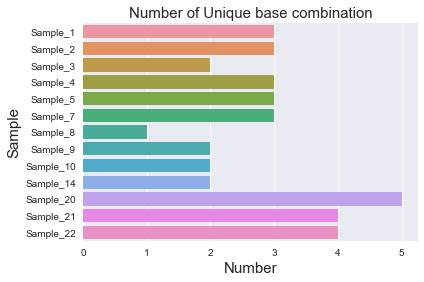

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

unqiue_mutation = pd.DataFrame(mutate_table.groupby('Sample').Mutation.nunique(), index=None)
unqiue_mutation = nat_sort_column(table = unqiue_mutation, series=unqiue_mutation.index)

unique_base = sns.barplot(x="Mutation", y=unqiue_mutation.index,data=unqiue_mutation)
unique_base.axes.set_title("Number of Unique base combination",fontsize=15)
unique_base.set_xlabel("Number",fontsize=15)
unique_base.set_ylabel("Sample",fontsize=15)
unique_base.tick_params(labelsize=10)
sns.plt.show()

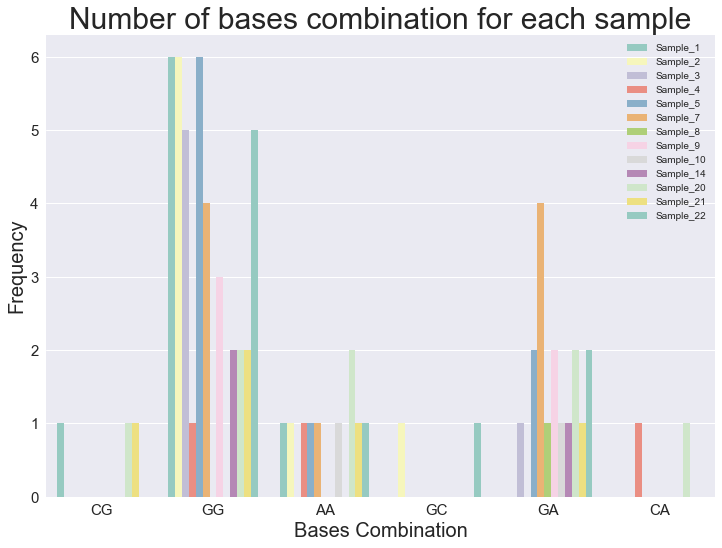

In [14]:
a4_dims = (12, 8.5)
fig, ax = plt.subplots(figsize=a4_dims)

mutate = sns.countplot(x='Mutation', hue='Sample', data=mutate_table, palette="Set3", ax = ax)
mutate.axes.set_title("Number of bases combination for each sample",fontsize=30)
mutate.set_xlabel("Bases Combination",fontsize=20)
mutate.set_ylabel("Frequency",fontsize=20)
mutate.tick_params(labelsize=15)
plt.legend(loc='upper right')
sns.plt.show()

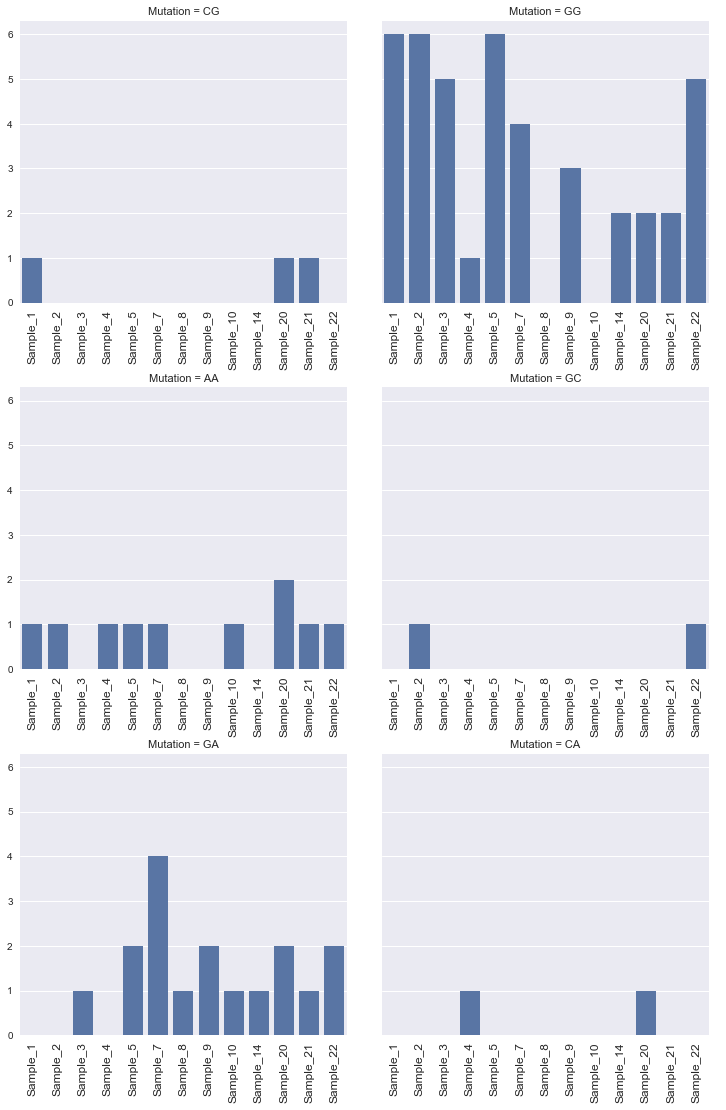

In [25]:
fig = sns.FacetGrid(data=mutate_table,col='Mutation',palette='Set1',size=5,aspect=1, col_wrap=2)
count_plot = fig.map(sns.countplot,'Sample', order=mutate_table.Sample.unique()).add_legend()
count_plot.set_xlabels('')
for ax in count_plot.axes:
    plt.setp(ax.get_xticklabels(), visible=True, fontsize=12, rotation=90)
plt.subplots_adjust(hspace=0.3)
plt.show()